In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
data['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

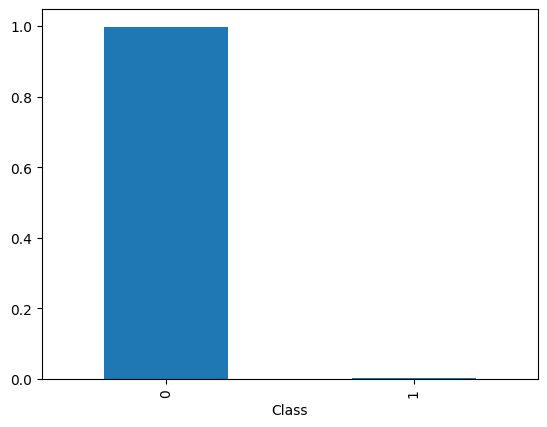

In [8]:
data['Class'].value_counts(normalize=True).plot(kind = 'bar')

In [ ]:
# Undersampling

# 0 - 492
# 1 - 492

# Oversampling

# 0 - 284315
# 1 - 284315

In [ ]:
# Imbalanaced Data
# It is a worst idea to go with Accuracy as a metrics
# Accuracy = 99.8%

In [9]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
X = data.drop(columns='Class')

In [13]:
y = data['Class']

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [16]:
train_y.value_counts(), test_y.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [17]:
train_y.value_counts(normalize=True), test_y.value_counts(normalize=True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [18]:
decision_unbalanced_model = DecisionTreeClassifier()

In [19]:
decision_unbalanced_model.fit(train_X, train_y)

DecisionTreeClassifier()

In [20]:
train_pred = decision_unbalanced_model.predict(train_X)
test_pred = decision_unbalanced_model.predict(test_X)

In [21]:
print("Train Accuracy : ",accuracy_score(train_y, train_pred))
print("Test Accuracy : ",accuracy_score(test_y, test_pred))

Train Accuracy :  1.0
Test Accuracy :  0.9991397773954567


In [22]:
print("Train Report : \n",classification_report(train_y, train_pred))
print("Test Report : \n",classification_report(test_y, test_pred))

Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
def model_pred_result(train_X, test_X, train_y, test_y, model):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Train Report : \n",classification_report(train_y, train_pred))
    print("Test Report : \n",classification_report(test_y, test_pred))
    print("Train Confusion. Matrix : \n",confusion_matrix(train_y, train_pred))
    print("Test Confusion. Matrix  : \n",confusion_matrix(test_y, test_pred))  
    print("TRAIN ROC AUC SCORE  : \n",roc_auc_score(train_y, train_pred))
    print("Test ROC AUC SCORE  : \n",roc_auc_score(test_y, test_pred))
    
    y_pred_proba = model.predict_proba(test_X)[:, 1] 
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Fraudulent Transaction Classification')
    plt.legend()
    plt.show()
    
    return accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

Train Accuracy :  1.0
Test Accuracy :  0.9990519995786665
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.79      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Train Confusion. Matrix : 
 [[227451      0]
 [     0    394]]
Test Confusion. Matrix  : 
 [[56831    33]
 [   21    77]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.8925669768470134


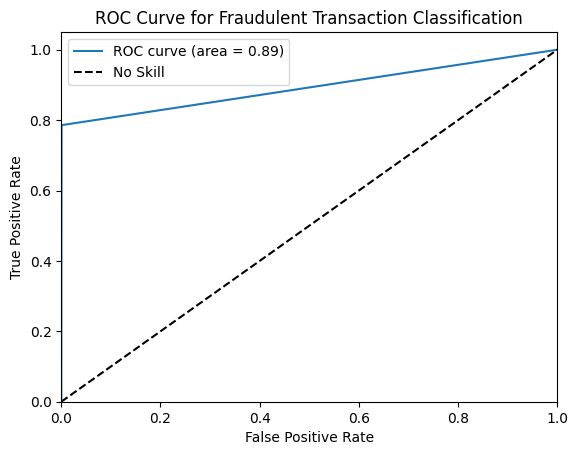

In [24]:
decision_unbalanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_X, test_X, train_y, test_y, decision_unbalanced_model)

Train Accuracy :  0.9999912221027453
Test Accuracy :  0.9995962220427653
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.99      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Train Confusion. Matrix : 
 [[227451      0]
 [     2    392]]
Test Confusion. Matrix  : 
 [[56862     2]
 [   21    77]]
TRAIN ROC AUC SCORE  : 
 0.9974619289340101
Test ROC AUC SCORE  : 
 0.892839557038347


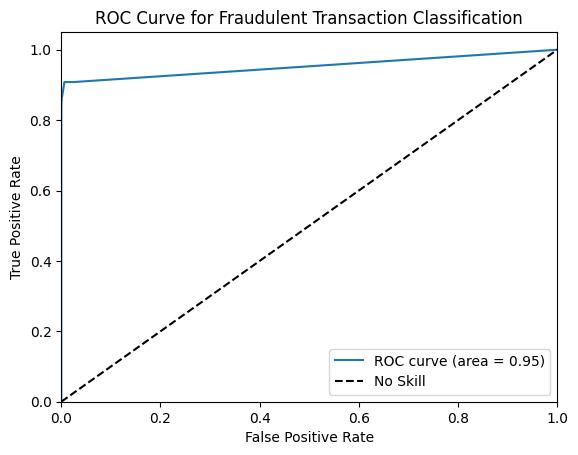

In [25]:
RandomForestClassifier_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_X, test_X, train_y, test_y, RandomForestClassifier_unbalanced_model)

In [26]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

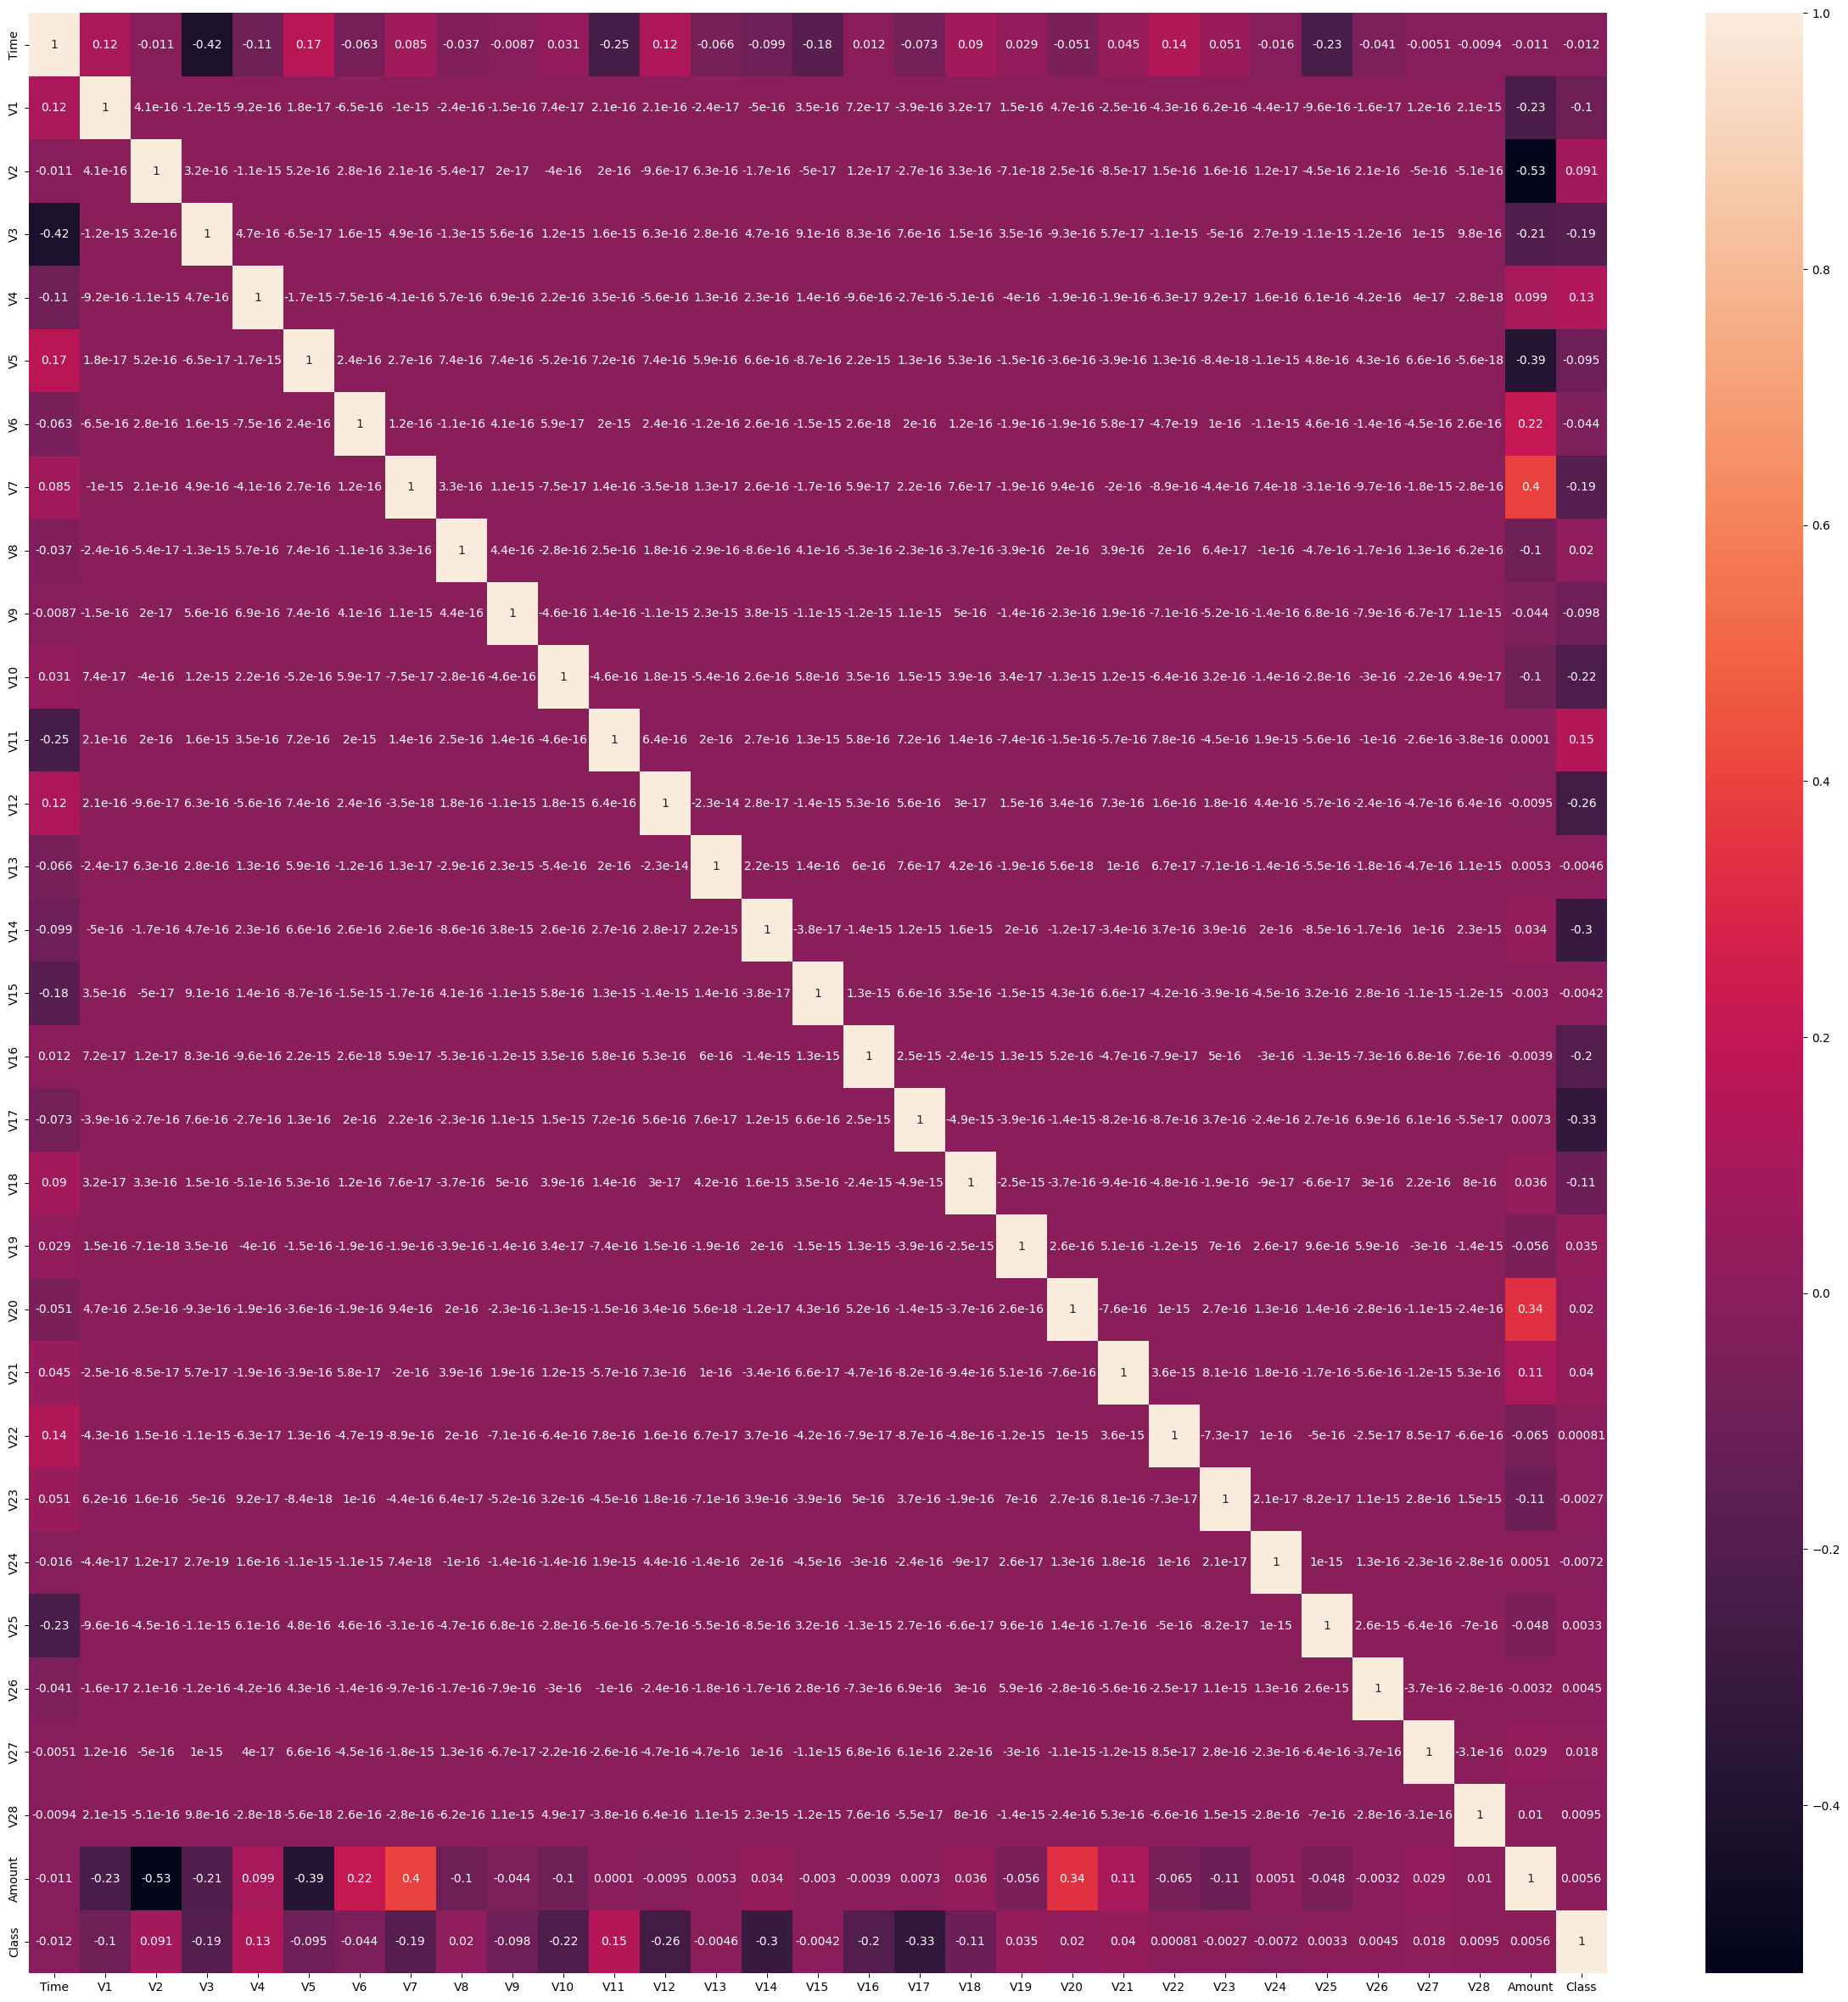

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

In [28]:
# Experiment with Standard scaling

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

In [29]:
X_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [30]:
data_scaled = pd.concat([X_scaled, y], axis = 1)

<Axes: >

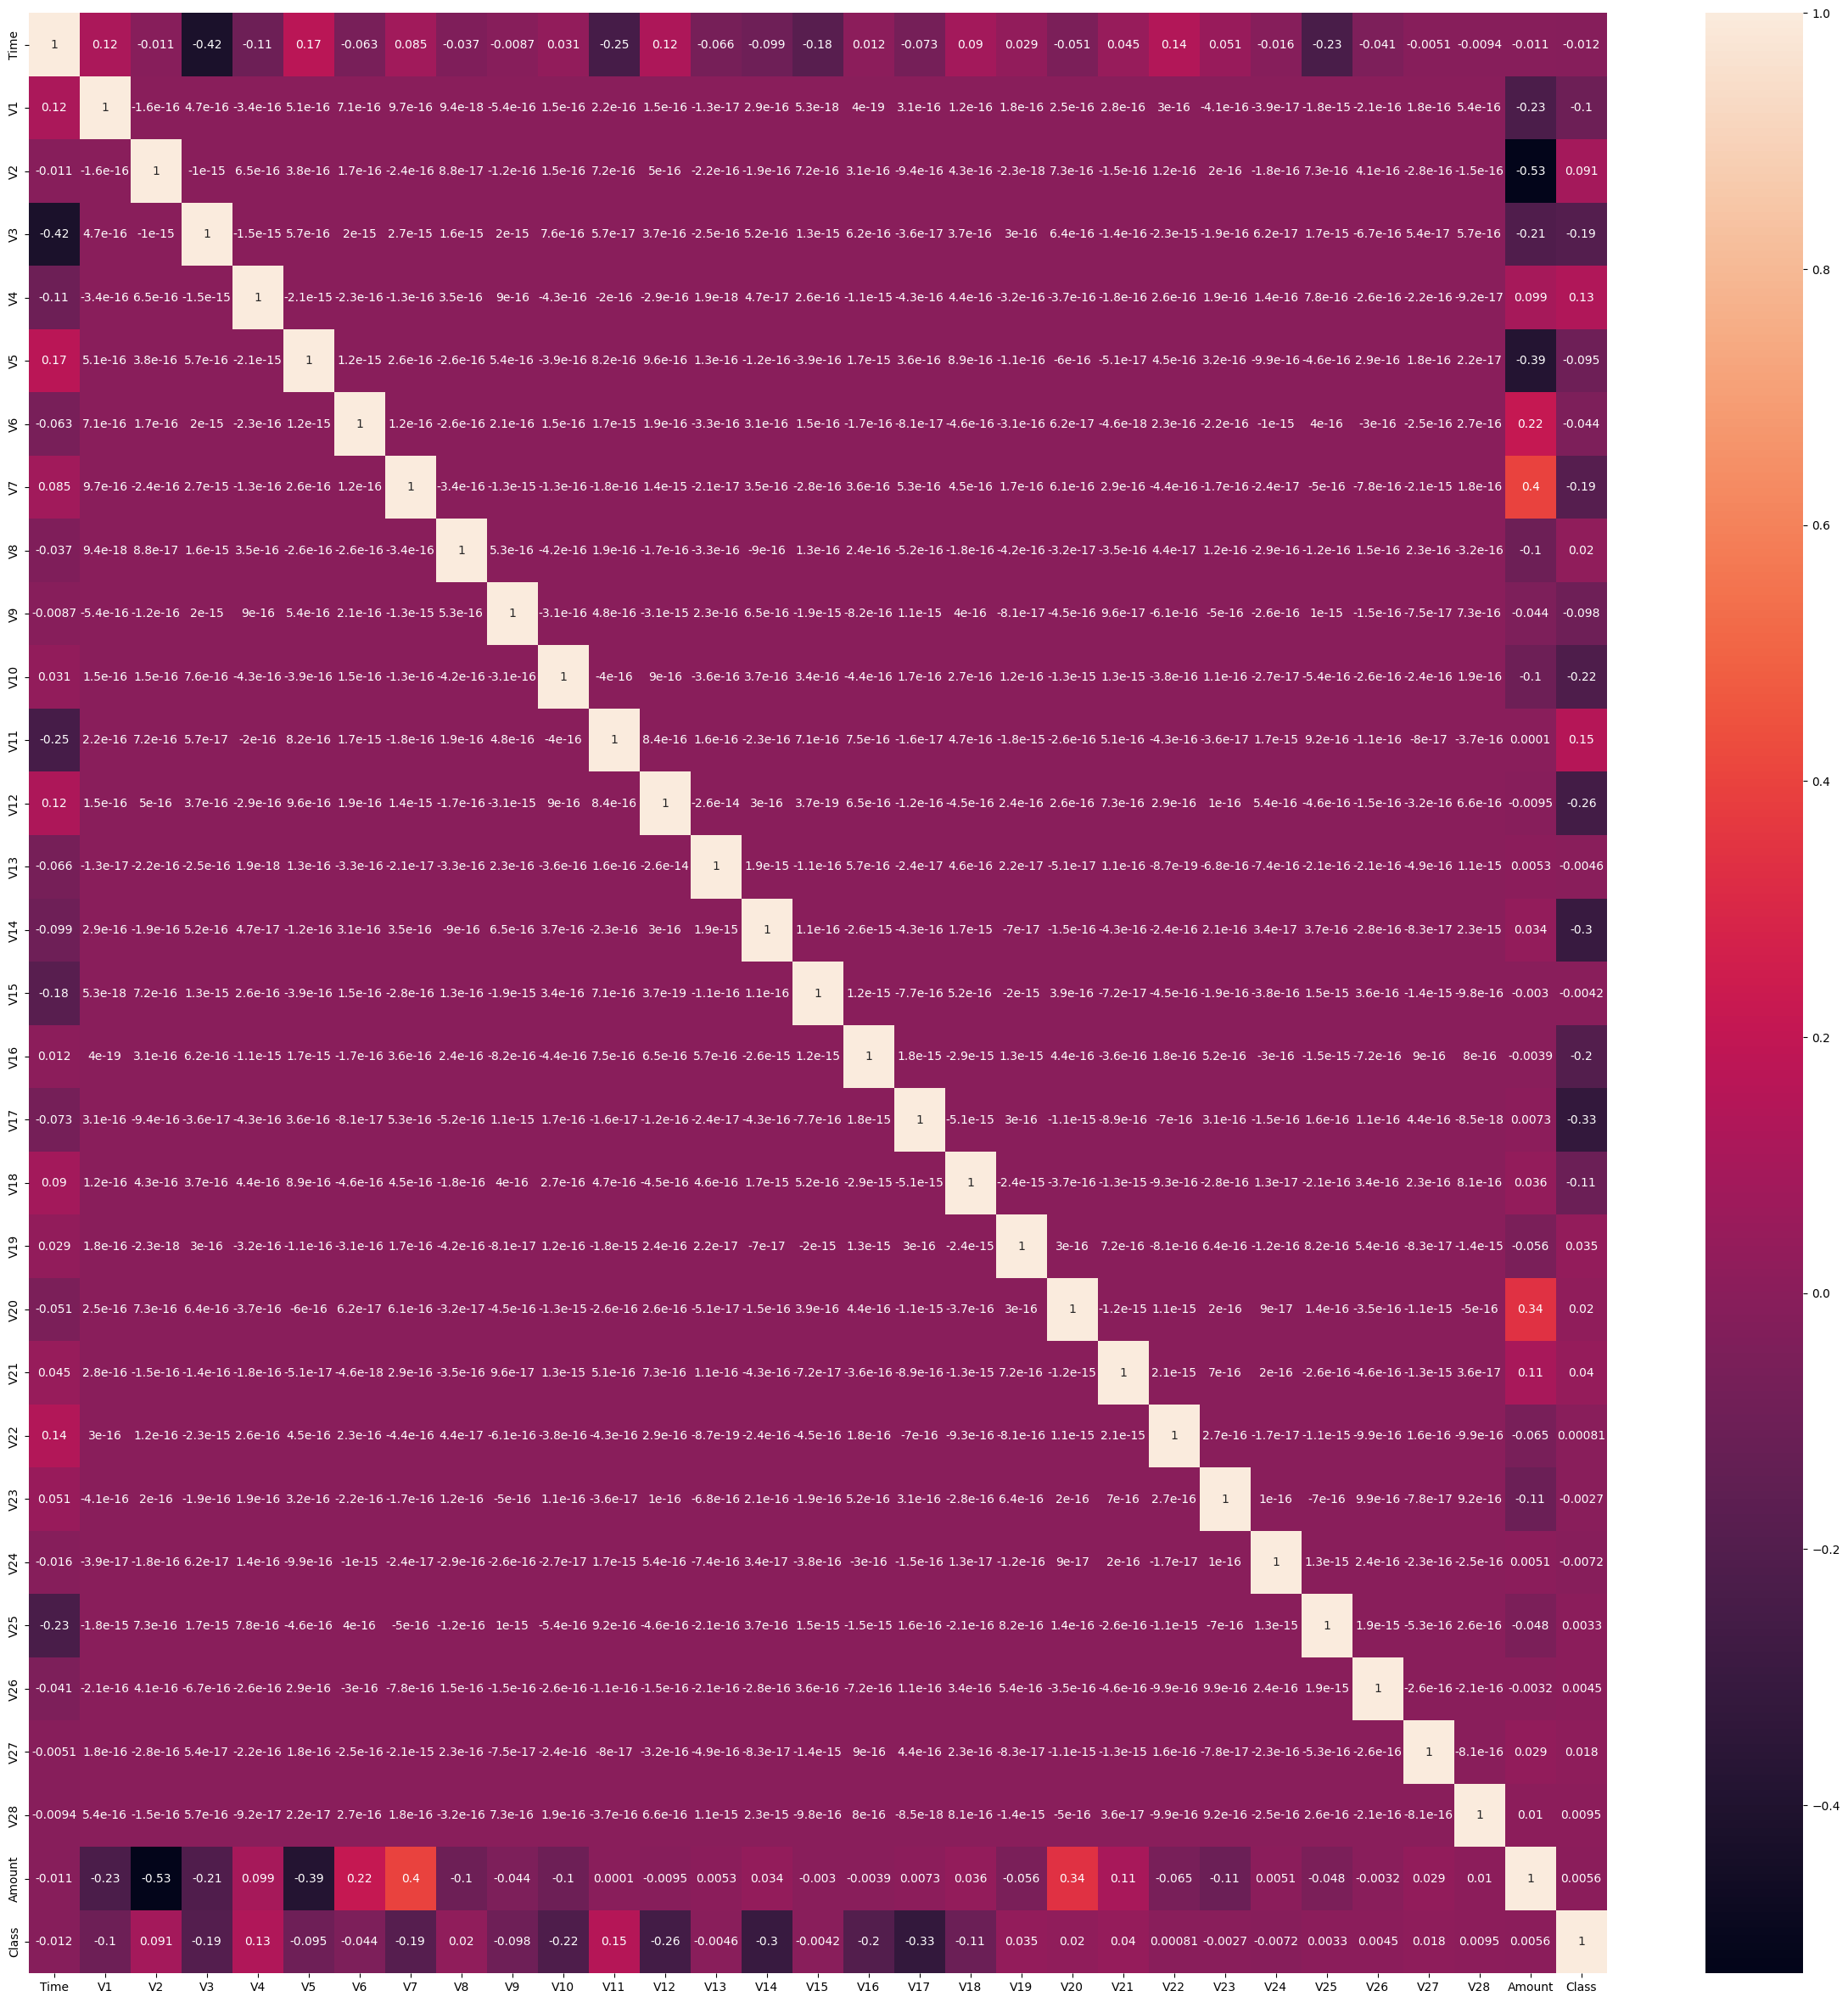

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(data_scaled.corr(), annot=True)

In [32]:
train_scaled_X, test_scaled_X,train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

In [33]:
train_scaled_X.shape, test_scaled_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [34]:
under_sampling = RandomUnderSampler()

In [35]:
train_y.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [36]:
train_scaled_under_sample_X, train_y_scaled_under_sample =  under_sampling.fit_resample(train_scaled_X, train_y)

In [37]:
train_data_scaled_undersample = pd.concat([train_scaled_under_sample_X,train_y_scaled_under_sample], axis = 1)


In [38]:
train_data_scaled_undersample['Class'].value_counts()

Class
0    380
1    380
Name: count, dtype: int64

<Axes: xlabel='Class'>

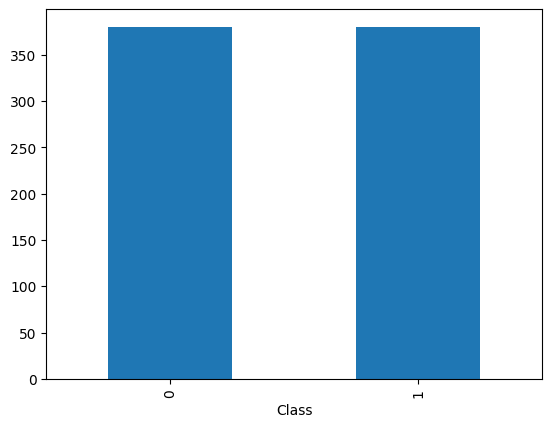

In [39]:
train_data_scaled_undersample['Class'].value_counts().plot(kind = 'bar')

<Axes: >

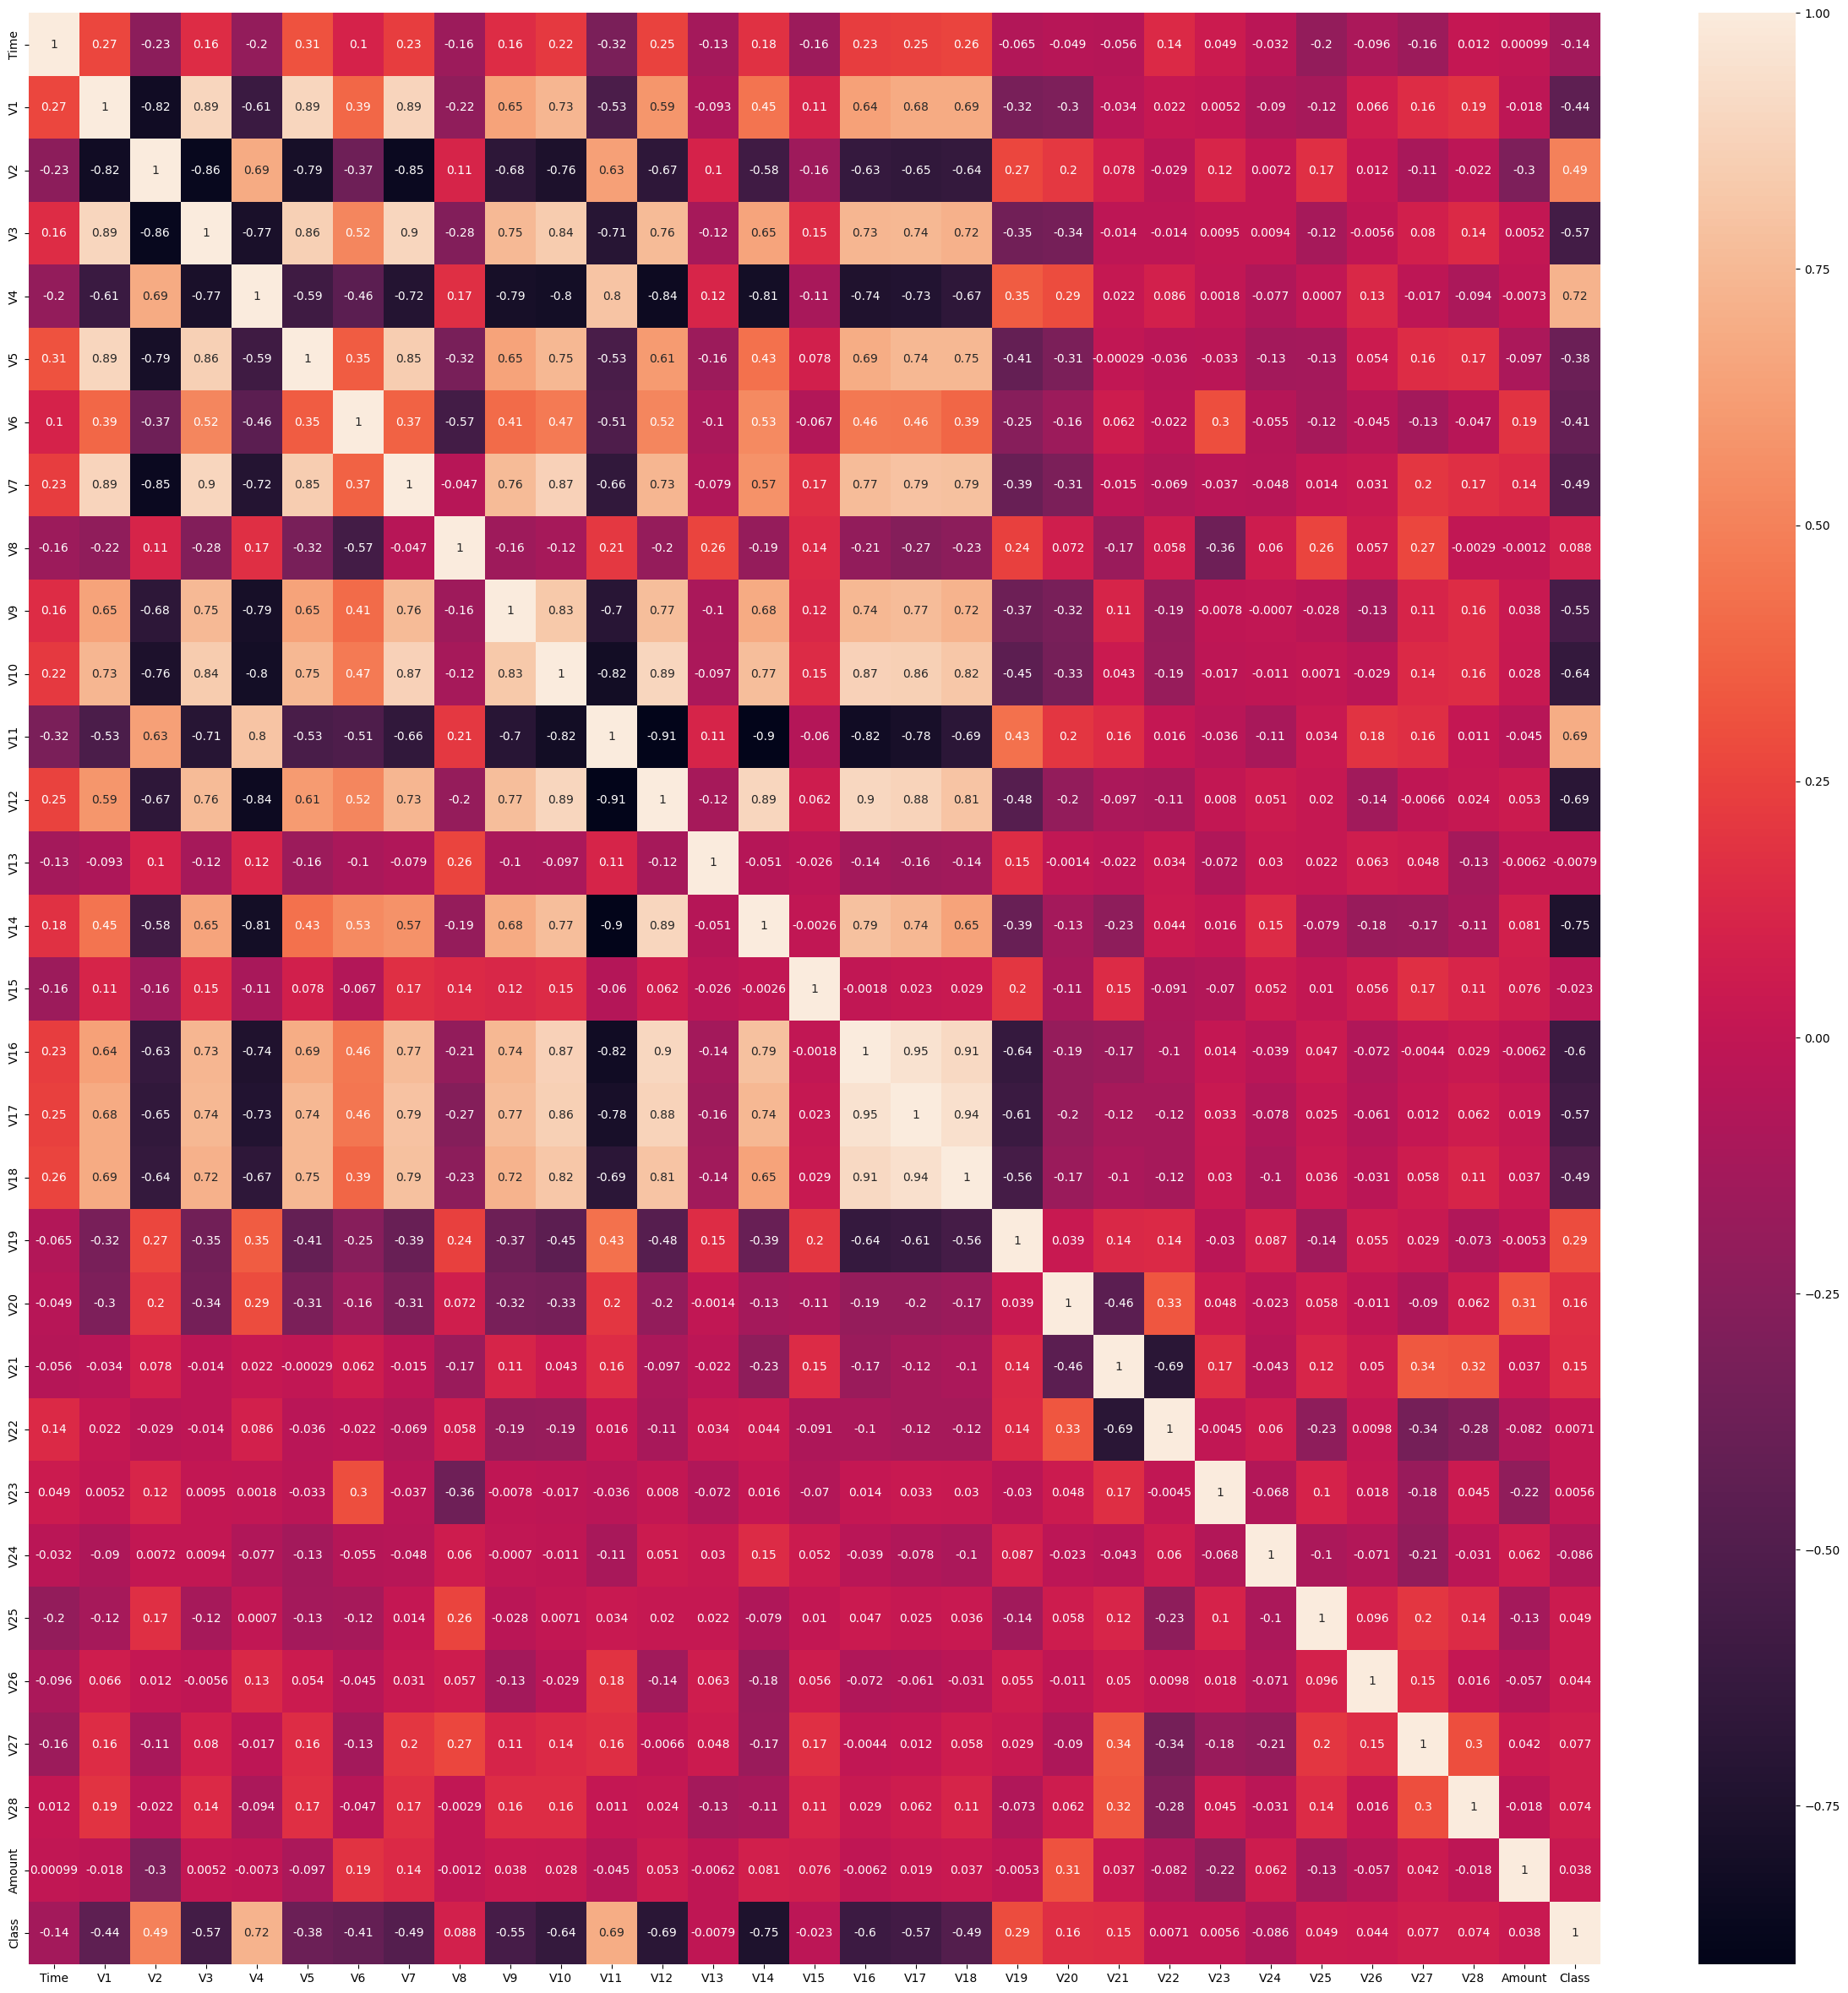

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(train_data_scaled_undersample.corr(), annot=True)

In [41]:
train_scaled_under_sample_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
133076,-0.307022,-0.997911,1.024167,-1.184582,-0.154753,0.970638,2.591184,-0.455161,1.692636,-0.770571,...,-0.088322,0.194240,0.162825,-0.073678,1.671243,0.125477,-0.648761,-0.104477,0.122215,-0.016830
8293,-1.763303,-0.186015,0.426874,1.391178,-0.259121,-0.300438,-0.361421,0.148068,-0.010330,0.735159,...,0.010410,0.111826,0.612818,-0.213221,0.916962,-0.568031,1.989185,-0.098689,0.114070,-0.289460
283761,1.622369,-0.302097,0.985667,0.637032,3.058056,0.860812,0.367273,1.978126,-0.785544,-2.382203,...,0.340329,0.022178,0.961895,-0.732895,0.010411,1.677642,1.407969,-1.089794,-1.294902,0.186952
173821,0.565156,1.081704,-0.605844,-0.623320,-0.603686,-0.697426,-0.633092,-0.612314,-0.048266,-0.205038,...,-0.163290,0.405763,1.115200,0.195773,0.020756,-0.199858,-0.236306,-0.077786,-0.211900,-0.263712
225291,1.039801,0.649578,-1.237784,-1.650835,-0.017935,-0.128994,-0.239869,0.549738,-0.415759,-0.821542,...,0.645243,-0.043482,-0.877226,-0.578917,0.133058,-0.007464,0.735751,-0.376164,0.073325,1.705745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154697,0.164486,-2.155122,1.738697,-3.883731,4.866952,-2.466878,-0.866487,-6.256553,2.387375,-2.282450,...,-0.295595,2.206319,2.160599,-0.925613,-0.097491,-3.509014,-0.150197,0.338760,-1.817264,-0.322884
153823,0.113905,-10.028046,8.905883,-15.037891,8.556368,-10.793823,0.631087,-22.642864,-9.980015,-8.156450,...,4.974097,-11.203022,4.572380,4.139922,0.321984,-2.292069,0.079678,-10.224037,-1.955053,-0.344114
181966,0.639869,-0.392697,0.812819,-1.432119,-0.107011,-0.469753,-0.730712,-1.379573,0.262690,-1.804340,...,-0.132691,-0.049178,-1.038433,-0.075447,0.591918,-0.551351,0.988138,0.620691,0.760377,-0.193306
150601,-0.022571,-1.680266,2.665281,-5.536157,3.145481,-3.470440,-3.182678,-7.452158,1.652806,-2.651432,...,1.933874,2.862190,0.823164,-0.525393,0.735995,1.122782,-0.827424,5.242413,3.183275,-0.349231


In [42]:
test_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,56223.0,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,...,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69
252263,155726.0,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,...,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99
221246,142491.0,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,...,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63
81910,59157.0,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,...,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59


Train Accuracy :  1.0
Test Accuracy :  0.903374179277413
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56850
           1       0.02      0.88      0.03       112

    accuracy                           0.90     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.90      0.95     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[51359  5491]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.893670530217364


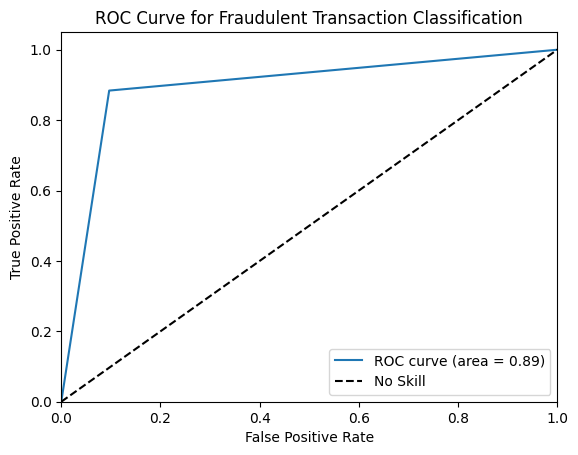

In [43]:
decision_unbalanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, decision_unbalanced_model)

Train Accuracy :  1.0
Test Accuracy :  0.972595765598118
Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.88      0.11       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55302  1548]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.928349509988692


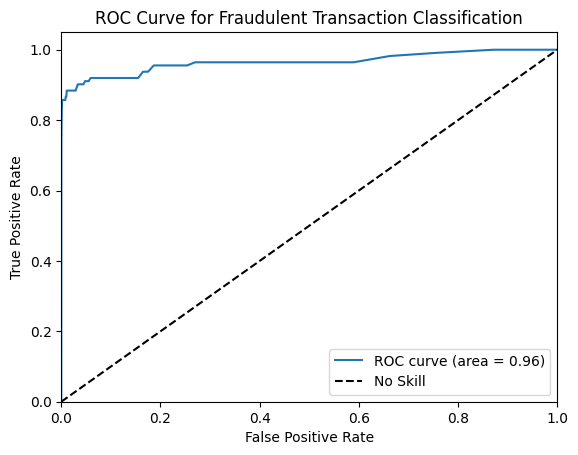

CPU times: user 2.54 s, sys: 7.01 ms, total: 2.55 s
Wall time: 1.68 s


In [44]:
%%time
random_balanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, random_balanced_model)

In [45]:
pd.Series(random_balanced_model.feature_importances_,index= random_balanced_model.feature_names_in_).sort_values(ascending=False)[:10].index

Index(['V14', 'V10', 'V17', 'V12', 'V4', 'V3', 'V11', 'V7', 'V16', 'V2'], dtype='object')

In [46]:
random_balanced_model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [47]:
RandomForestClassifier()

RandomForestClassifier()

In [48]:
# Hyper paramneter Tuning - GridSearch

param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'class_weight' : [None, "balanced", "balanced_subsample"]
}

grid = GridSearchCV(estimator = random_balanced_model, param_grid=param_grid, cv= 10, verbose=2, scoring='f1')

In [ ]:
%%time
grid.fit(train_scaled_under_sample_X, train_y_scaled_under_sample)

In [50]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=50)

In [51]:
grid.best_score_

0.9411993291993292

In [52]:
grid.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [53]:
model = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)

model.fit(train_scaled_under_sample_X, train_y_scaled_under_sample)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)

In [54]:
model.feature_importances_

array([0.00598325, 0.00654304, 0.0156064 , 0.05466978, 0.08775779,
       0.01553489, 0.00954344, 0.07058392, 0.01648159, 0.01482764,
       0.10130863, 0.05653073, 0.09062097, 0.00772542, 0.17421306,
       0.00379397, 0.04561948, 0.08706971, 0.02816771, 0.00801178,
       0.01458744, 0.01165283, 0.00517174, 0.00793637, 0.00531078,
       0.00464572, 0.00868613, 0.01230775, 0.00894724, 0.02016082])

In [55]:
model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

<Axes: >

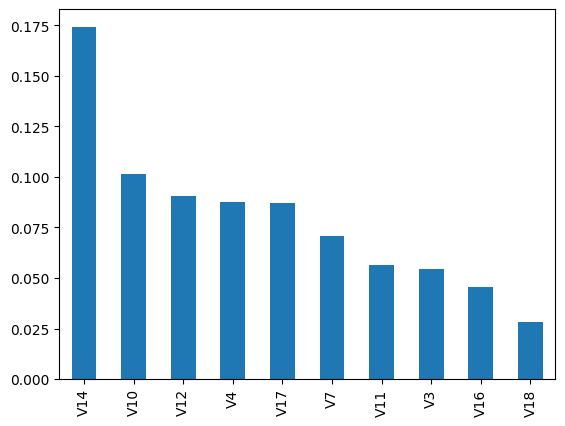

In [56]:
pd.Series(model.feature_importances_,index= model.feature_names_in_).sort_values(ascending=False)[:10].plot(kind = 'bar')

Train Accuracy :  0.9947368421052631
Test Accuracy :  0.9780379902391068
Train Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       380
           1       1.00      0.99      0.99       380

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.07      0.89      0.14       112

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  4 376]]
Test Confusion. Matrix  : 
 [[55611  1239]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 0.9947368421052631
Test ROC AUC SCORE  : 
 0.9355314738032416


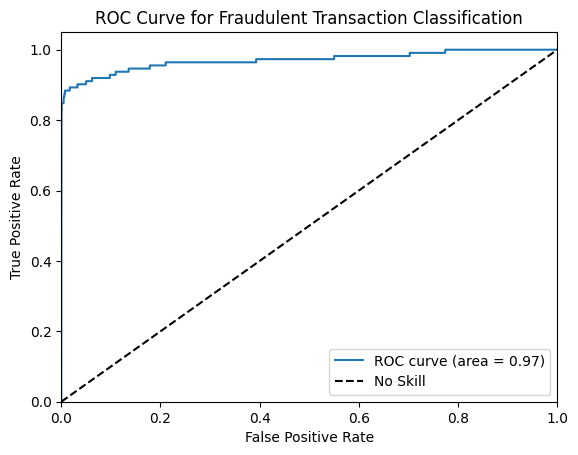

In [57]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X, test_scaled_X, train_y_scaled_under_sample, test_y, model)

In [58]:
top_feature = pd.Series(model.feature_importances_,index= model.feature_names_in_).sort_values(ascending=False)[:10].index.values

Train Accuracy :  0.9907894736842106
Test Accuracy :  0.9728415434851304
Train Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       380
           1       1.00      0.98      0.99       380

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.90      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  7 373]]
Test Confusion. Matrix  : 
 [[55314  1536]
 [   11   101]]
TRAIN ROC AUC SCORE  : 
 0.9907894736842106
Test ROC AUC SCORE  : 
 0.9373836223143611


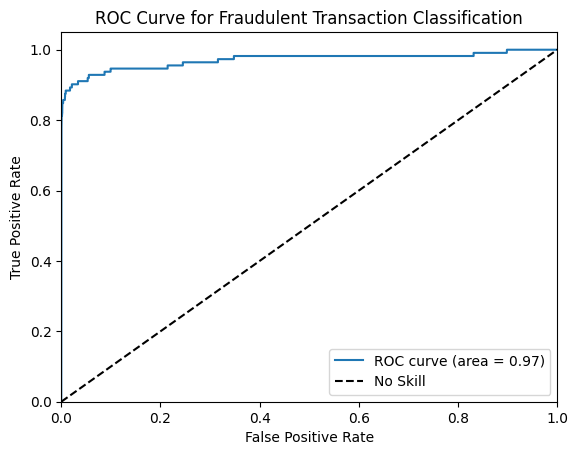

In [59]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_under_sample_X[top_feature], test_scaled_X[top_feature], train_y_scaled_under_sample, test_y, model)